In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### QAQC reports
1. Subset of FacDB records that don't have a geometry with GRC code
2. Percent geocoded / with geometry by data source 
3. Percent geocoded / with geometry by fac type / subgroup / group / domain
4. Change in distribution of number of records by fac type / subgroup / group / domain between current and previous (live) version

In [2]:
# import the qc reports
geo_rejects = pd.read_csv('https://raw.githubusercontent.com/NYCPlanning/db-facilities-tmp/dev/output/geo_rejects.csv')
qc_diff = pd.read_csv('https://raw.githubusercontent.com/NYCPlanning/db-facilities-tmp/dev/output/qc_diff.csv')
facdb = pd.read_csv('https://raw.githubusercontent.com/NYCPlanning/db-facilities-tmp/dev/output/facilities.csv')
facdb_old = pd.read_csv('https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/facilities_csv_201901.zip')

#### 1.Subset of FacDB records that don't have a geometry with GRC code (Click [here](https://github.com/NYCPlanning/db-facilities-tmp/blob/dev/output/geo_rejects.csv) to see the full table)

In [3]:
geo_rejects.fillna('', inplace=True)

geo_rejects['message'] = geo_rejects.message.apply(lambda x : 'NO MESSAGE' if x == '' else x)
geo_rejects['message'] = geo_rejects.message.apply(lambda x : 'ADDRESS NOT RECOGNIZED' if ('NOT RECOGNIZED' in x) else x)
geo_rejects['message'] = geo_rejects.message.apply(lambda x : 'ADDRESS CONTAINS INVALID CHARACTER' if ('INVALID CHARACTER' in x) else x)
geo_rejects['message'] = geo_rejects.message.apply(lambda x : 'ADDRESS CONTAINS UNKNOWN OR INVALID SUFFIX/ENDING' if ('INVALID SUFFIX' in x) else x)

There are 1219 facilities not having geometries.


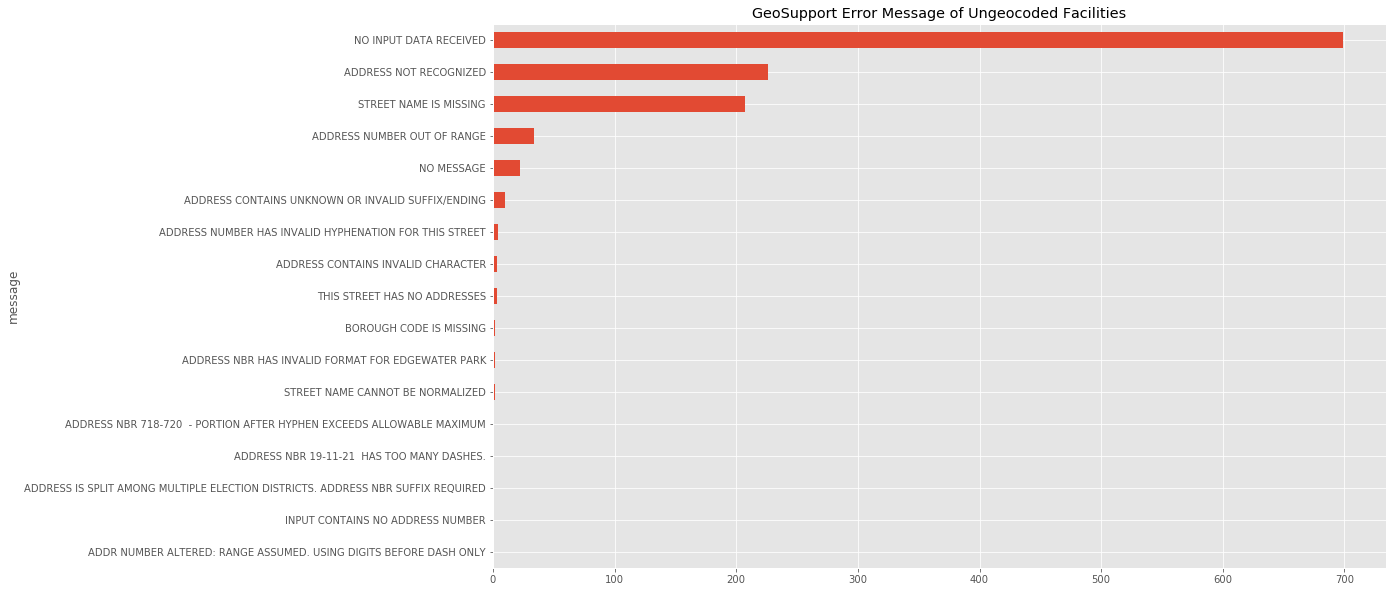

In [4]:
non_geom = len(geo_rejects)
print("There are {} facilities not having geometries.".format(non_geom))

geo_rejects.groupby('message').count()['uid']\
                                .sort_values(ascending=True)\
                                .plot(kind='barh', figsize=(16,10), title = 'GeoSupport Error Message of Ungeocoded Facilities')

#### 2. Percent geocoded / with geometry by data source (Click [here](https://github.com/NYCPlanning/db-facilities-tmp/blob/dev/output/qc_mapped_datasource.csv) to see the full table)

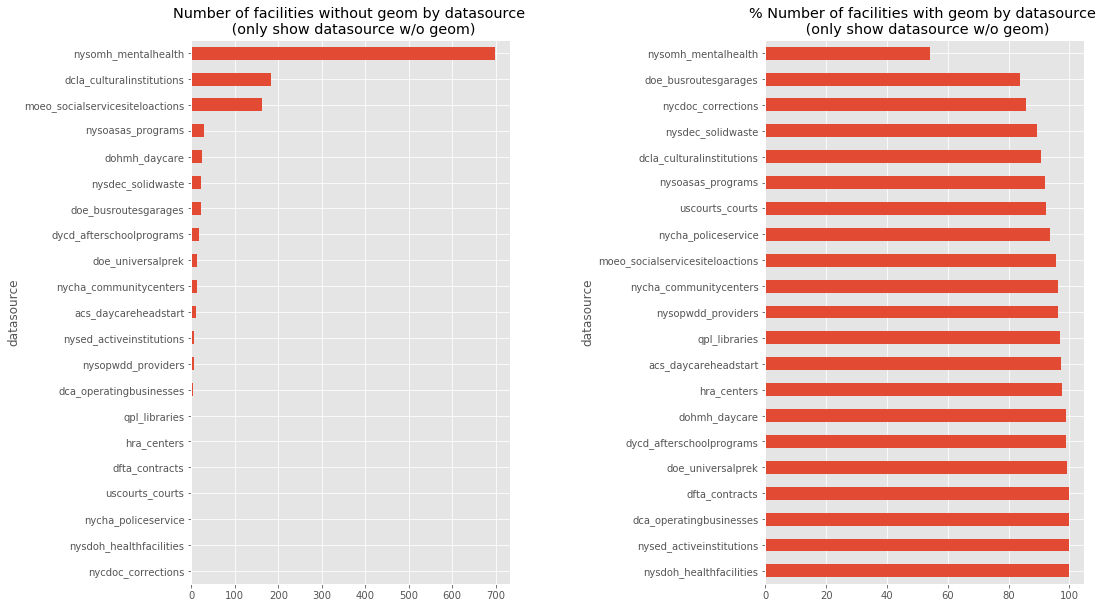

In [5]:
granularity = 'datasource'
nongeom_counts = facdb[facdb.geom.isna()][granularity].nunique()

plt.subplots_adjust(wspace=0.8)
plt.subplot(1, 2, 1)
facdb[facdb.geom.isna()].groupby(granularity).count()['uid']\
                                .sort_values(ascending=False)\
                                .head(nongeom_counts)[::-1]\
                                .plot(kind='barh', figsize=(16,10), title = 'Number of facilities without geom by {} \n (only show {} w/o geom)'
                                                                                                                      .format(granularity, granularity))
plt.subplot(1, 2, 2)
((facdb[~facdb.geom.isna()].groupby(granularity).count()['uid']/facdb.groupby(granularity).count()['uid'])*100)\
                                  .sort_values(ascending=True)\
                                  .head(nongeom_counts)[::-1]\
                                  .plot(kind='barh', figsize=(16,10), title = '% Number of facilities with geom by {} \n (only show {} w/o geom)'
                                                                                                                      .format(granularity, granularity))

#### 3. Percent geocoded / with geometry by fac subgroup / group / domain -- Non geoms (Click [here](https://github.com/NYCPlanning/db-facilities-tmp/blob/dev/output/qc_mapped_subgroup.csv) to see the full table)

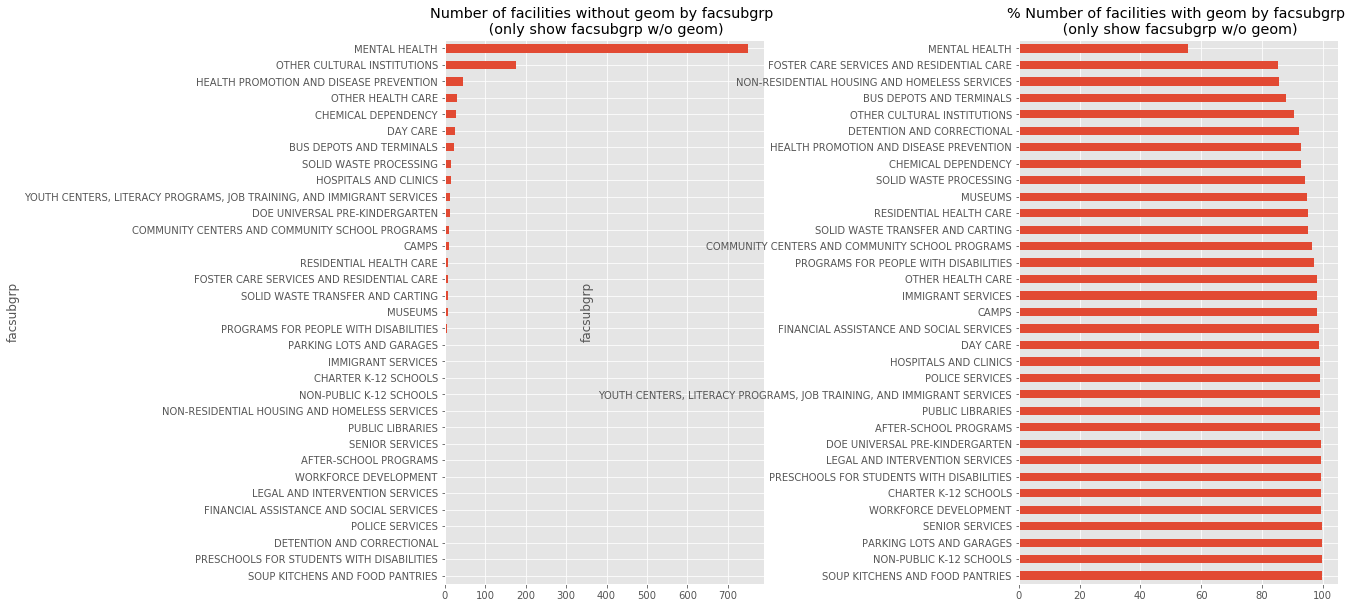

In [6]:
granularity = 'facsubgrp'
nongeom_counts = facdb[facdb.geom.isna()][granularity].nunique()

plt.subplots_adjust(wspace=0.8)
plt.subplot(1, 2, 1)
facdb[facdb.geom.isna()].groupby(granularity).count()['uid']\
                                .sort_values(ascending=False)\
                                .head(nongeom_counts)[::-1]\
                                .plot(kind='barh', figsize=(16,10), title = 'Number of facilities without geom by {} \n (only show {} w/o geom)'
                                                                                                                      .format(granularity, granularity))
plt.subplot(1, 2, 2)
((facdb[~facdb.geom.isna()].groupby(granularity).count()['uid']/facdb.groupby(granularity).count()['uid'])*100)\
                                  .sort_values(ascending=True)\
                                  .head(nongeom_counts)[::-1]\
                                  .plot(kind='barh', figsize=(16,10), title = '% Number of facilities with geom by {} \n (only show {} w/o geom)'
                                                                                                                      .format(granularity, granularity))

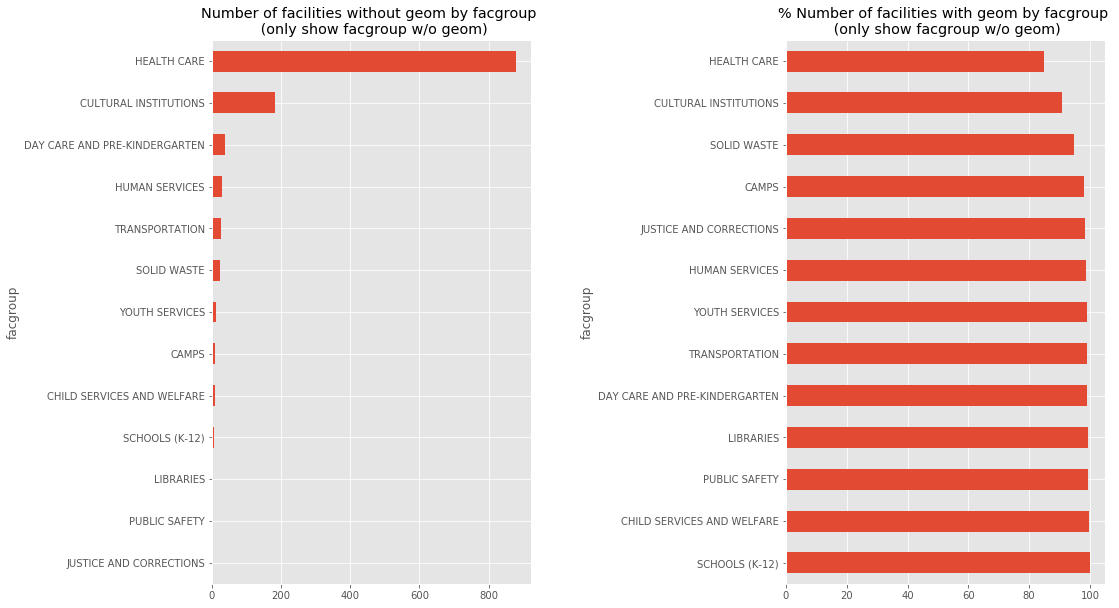

In [7]:
granularity = 'facgroup'
nongeom_counts = facdb[facdb.geom.isna()][granularity].nunique()

plt.subplots_adjust(wspace=0.8)
plt.subplot(1, 2, 1)
facdb[facdb.geom.isna()].groupby(granularity).count()['uid']\
                                .sort_values(ascending=False)\
                                .head(nongeom_counts)[::-1]\
                                .plot(kind='barh', figsize=(16,10), title = 'Number of facilities without geom by {} \n (only show {} w/o geom)'
                                                                                                                      .format(granularity, granularity))
plt.subplot(1, 2, 2)
((facdb[~facdb.geom.isna()].groupby(granularity).count()['uid']/facdb.groupby(granularity).count()['uid'])*100)\
                                  .sort_values(ascending=True)\
                                  .head(nongeom_counts)[::-1]\
                                  .plot(kind='barh', figsize=(16,10), title = '% Number of facilities with geom by {} \n (only show {} w/o geom)'
                                                                                                                      .format(granularity, granularity))

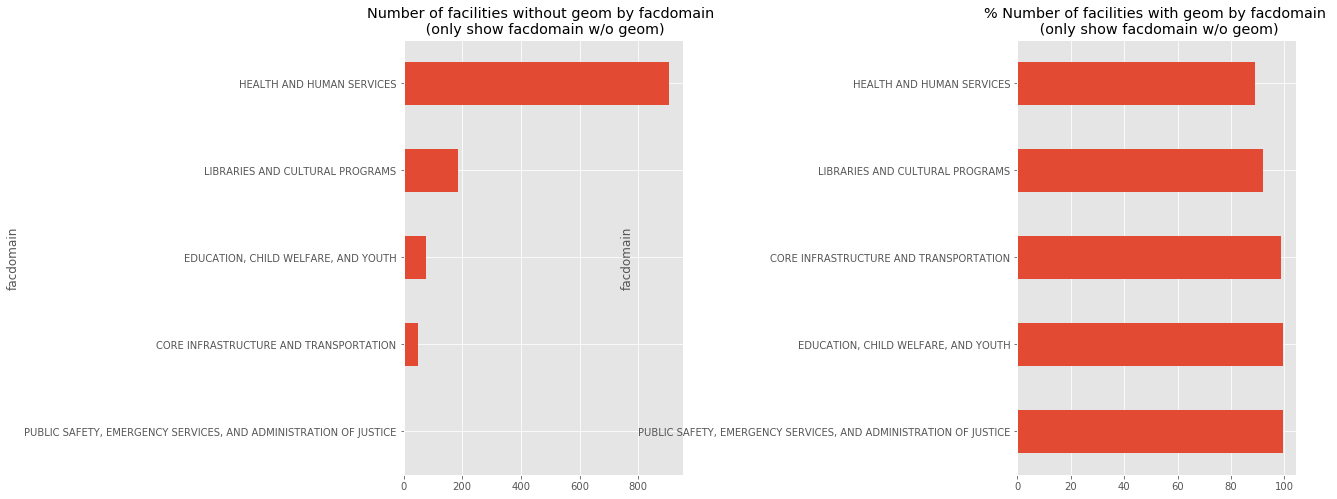

In [8]:
granularity = 'facdomain'
nongeom_counts = facdb[facdb.geom.isna()][granularity].nunique()

plt.subplots_adjust(wspace=1.2)
plt.subplot(1, 2, 1)
facdb[facdb.geom.isna()].groupby(granularity).count()['uid']\
                                .sort_values(ascending=False)\
                                .head(nongeom_counts)[::-1]\
                                .plot(kind='barh', figsize=(16,8), title = 'Number of facilities without geom by {} \n (only show {} w/o geom)'
                                                                                                                      .format(granularity, granularity))
plt.subplot(1, 2, 2)
((facdb[~facdb.geom.isna()].groupby(granularity).count()['uid']/facdb.groupby(granularity).count()['uid'])*100)\
                                  .sort_values(ascending=True)\
                                  .head(nongeom_counts)[::-1]\
                                  .plot(kind='barh', figsize=(16,8), title = '% Number of facilities with geom by {} \n (only show {} w/o geom)'
                                                                                                                      .format(granularity, granularity))

#### 4.1 Change in distribution of number of records by fac type / subgroup / group / domain between current and previous (live) version (Click [here](https://github.com/NYCPlanning/db-facilities-tmp/blob/dev/output/qc_diff.csv) to see the full table)

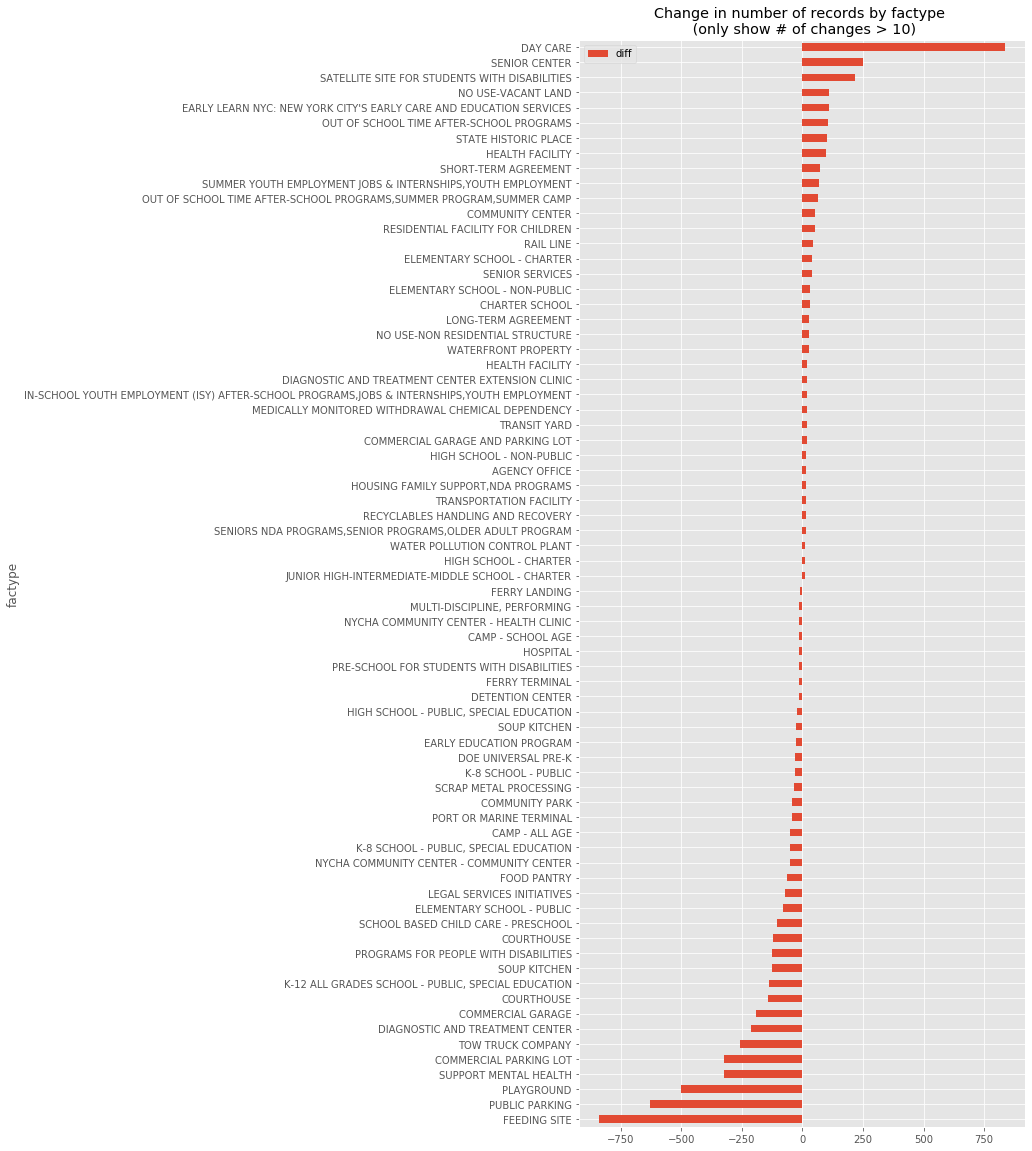

In [9]:
granularity = 'factype'
threshold = 10

qc_diff[(~qc_diff['diff'].isna())&(abs(qc_diff['diff'])>threshold)]\
                                .sort_values(by='diff',ascending=True)\
                                .plot(x=granularity, y='diff', kind='barh', figsize=(8,20), 
                                        title = 'Change in number of records by {} \n (only show # of changes > {})'
                                                                                      .format(granularity, threshold))

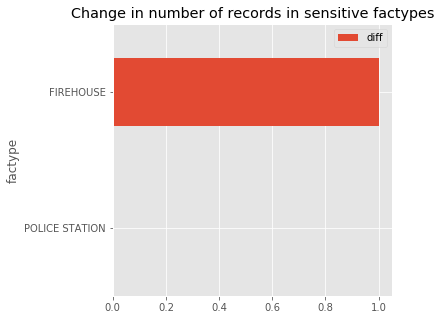

In [10]:
sensitive_factype = ['FIREHOUSE', 'POLICE STATION']
granularity = 'factype'
threshold = 10

qc_diff[qc_diff.factype.isin(sensitive_factype)]\
                                .sort_values(by='diff',ascending=True)\
                                .plot(x=granularity, y='diff', kind='barh', figsize=(5,5), 
                                        title = 'Change in number of records in sensitive {}s'.format(granularity))

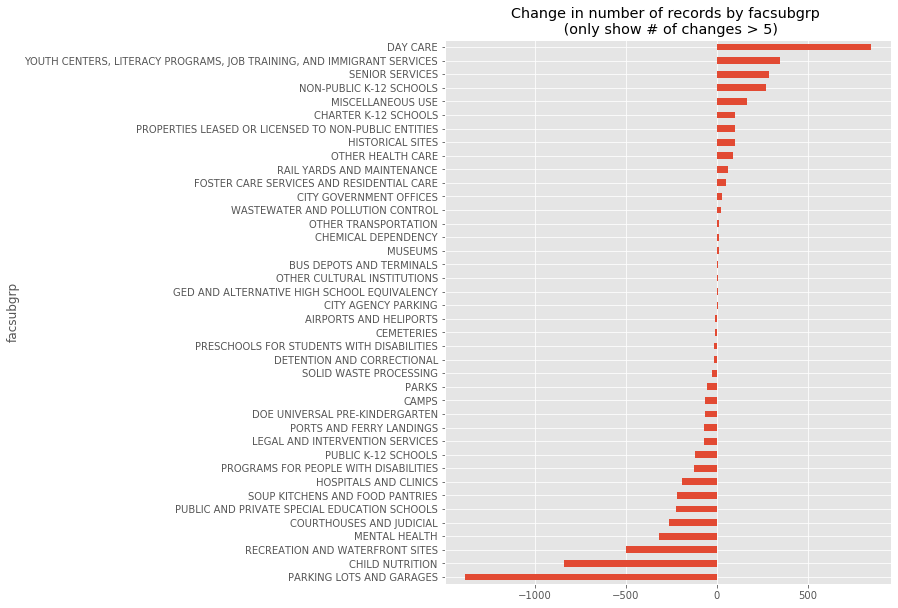

In [11]:
granularity = 'facsubgrp'
threshold = 5

subset = qc_diff[~qc_diff['diff'].isna()].groupby(granularity).sum()
subset[abs(subset['diff'])>threshold]\
                                .groupby(granularity).sum()['diff']\
                                .sort_values(ascending=True)\
                                .plot(x=granularity, y='diff', kind='barh', figsize=(8,10), 
                                        title = 'Change in number of records by {} \n (only show # of changes > {})'
                                                                                      .format(granularity, threshold))

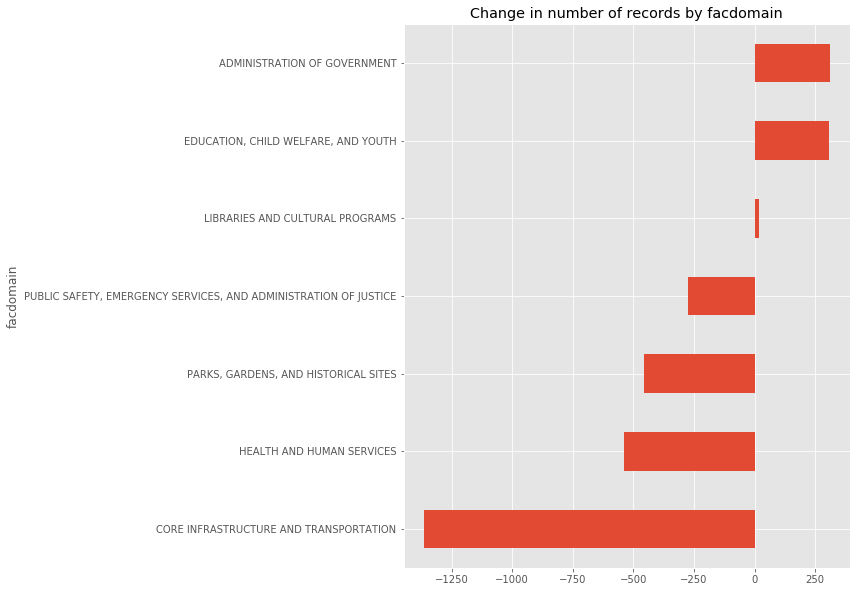

In [12]:
granularity = 'facdomain'
threshold = 0

subset = qc_diff[~qc_diff['diff'].isna()].groupby(granularity).sum()
subset[abs(subset['diff'])>threshold]\
                                .groupby(granularity).sum()['diff']\
                                .sort_values(ascending=True)\
                                .plot(x=granularity, y='diff', kind='barh', figsize=(8,10), 
                                        title = 'Change in number of records by {}'.format(granularity, threshold))

#### 4.2 Number of records in new or non-existing fac type / subgroup / group / domain between current and previous (live) version (Click [here](https://github.com/NYCPlanning/db-facilities-tmp/blob/dev/output/qc_diff.csv) to see the full table)

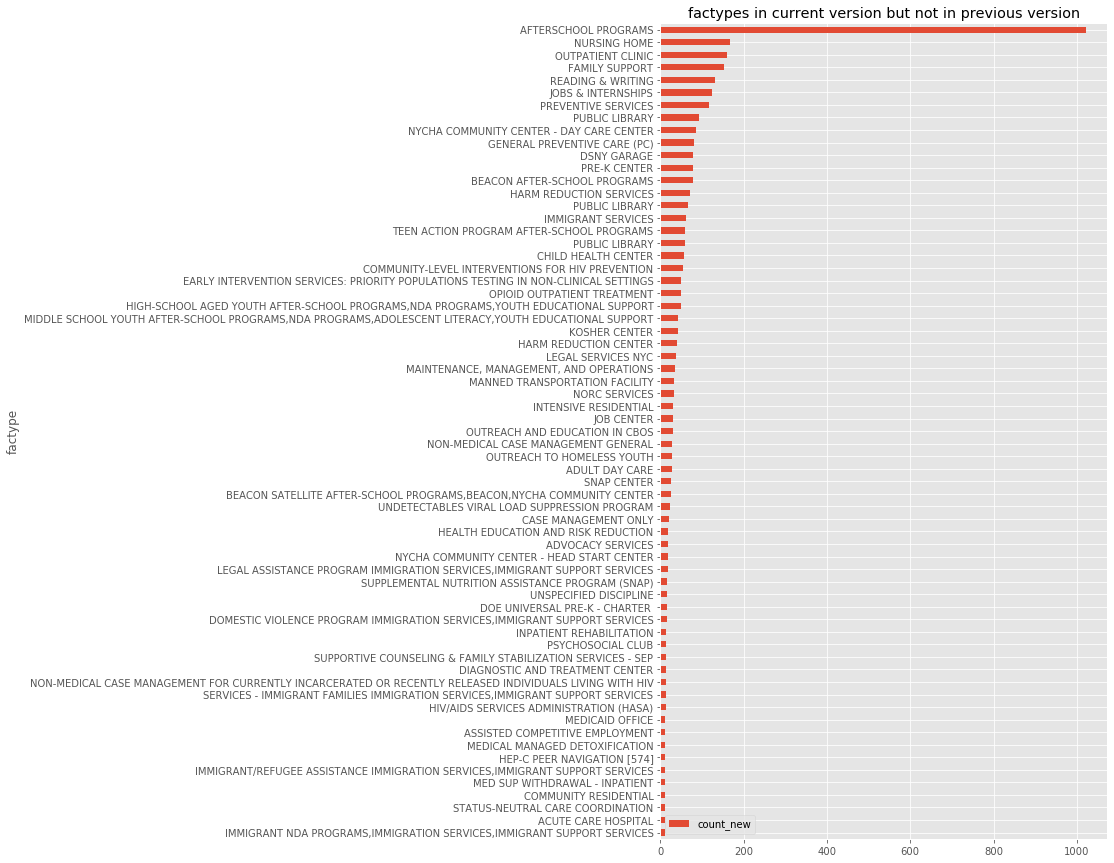

In [13]:
granularity = 'factype'
threshold = 10

qc_diff[(qc_diff['diff'].isna())&(~qc_diff['count_new'].isna())&(qc_diff['count_new']>threshold)]\
                                .sort_values(by='count_new',ascending=True)\
                                .plot(x=granularity, y='count_new', kind='barh', figsize=(8,15), 
                                        title = '{}s in current version but not in previous version'.format(granularity))

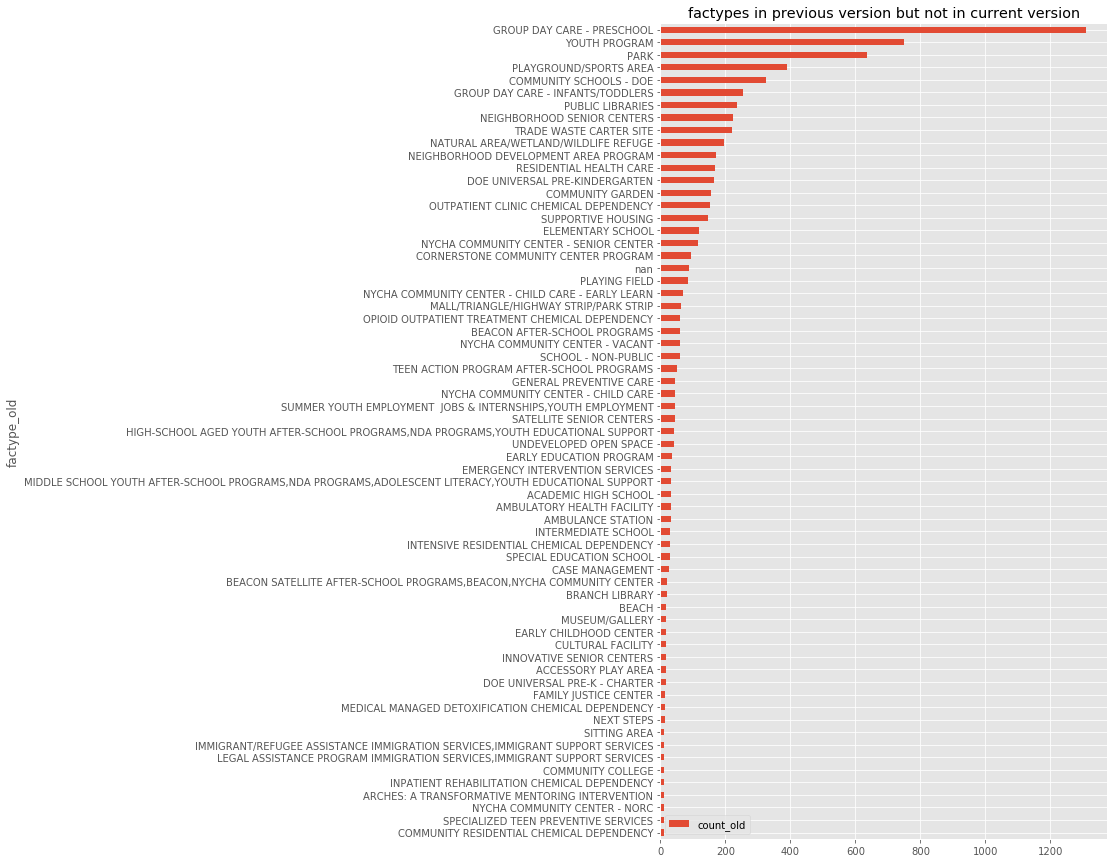

In [14]:
granularity = 'factype'
threshold = 10

qc_diff[(qc_diff['diff'].isna())&(~qc_diff['count_old'].isna())&(qc_diff['count_old']>threshold)]\
                                .sort_values(by='count_old',ascending=True)\
                                .plot(x=granularity+'_old', y='count_old', kind='barh', figsize=(8,15), 
                                        title = '{}s in previous version but not in current version'.format(granularity))

No new facdomain


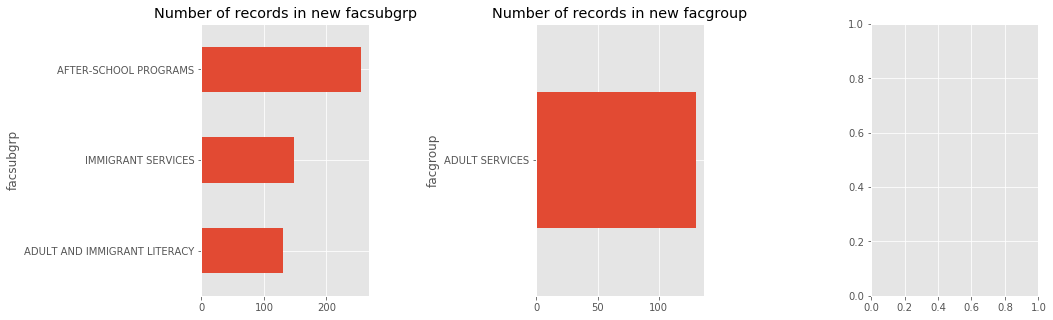

In [15]:
plt.subplots_adjust(wspace=1)

granularity = 'facsubgrp'
plt.subplot(1, 3, 1)
if len(qc_diff[~qc_diff[granularity].isin(qc_diff[granularity+'_old'].values)]) == 0:
    print('No new {}'.format(granularity))
else:
    qc_diff[~qc_diff[granularity].isin(qc_diff[granularity+'_old'].values)]\
                                    .groupby(granularity).sum()['count_new']\
                                    .sort_values(ascending=True)\
                                    .plot(x=granularity, y='count_new', kind='barh', figsize=(15,5), 
                                            title = 'Number of records in new {}'.format(granularity))
granularity = 'facgroup'
plt.subplot(1, 3, 2)
if len(qc_diff[~qc_diff[granularity].isin(qc_diff[granularity+'_old'].values)]) == 0:
    print('No new {}'.format(granularity))
else:
    qc_diff[~qc_diff[granularity].isin(qc_diff[granularity+'_old'].values)]\
                                    .groupby(granularity).sum()['count_new']\
                                    .sort_values(ascending=True)\
                                    .plot(x=granularity, y='count_new', kind='barh', figsize=(15,5), 
                                            title = 'Number of records in new {}'.format(granularity))

granularity = 'facdomain'
plt.subplot(1, 3, 3)
if len(qc_diff[~qc_diff[granularity].isin(qc_diff[granularity+'_old'].values)]) == 0:
    print('No new {}'.format(granularity))
else:
    qc_diff[~qc_diff[granularity].isin(qc_diff[granularity+'_old'].values)]\
                                    .groupby(granularity).sum()['count_new']\
                                    .sort_values(ascending=True)\
                                    .plot(x=granularity, y='count_new', kind='barh', figsize=(15,5),
                                          title = 'Number of records in new {}'.format(granularity))

No facgroup is lost
No facdomain is lost


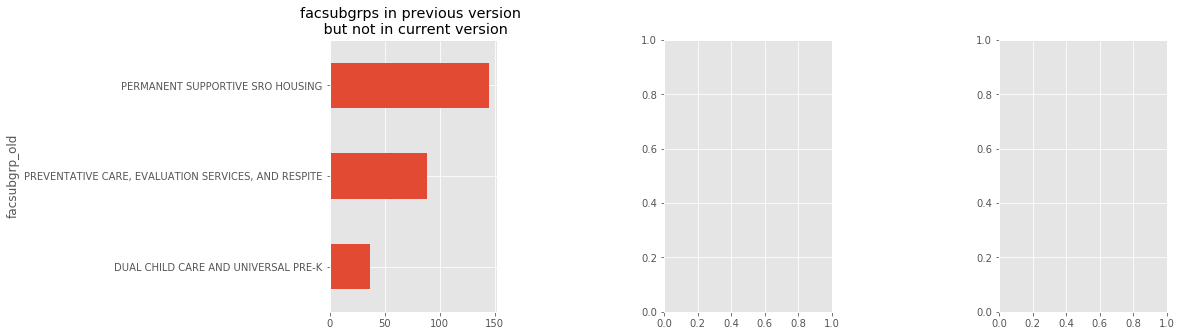

In [16]:
plt.subplots_adjust(wspace=1)

granularity = 'facsubgrp'
plt.subplot(1, 3, 1)
if len(qc_diff[~qc_diff[granularity+'_old'].isin(qc_diff[granularity].values)]) == 0:
    print('No {} is losing'.format(granularity))
else:
    qc_diff[~qc_diff[granularity+'_old'].isin(qc_diff[granularity].values)]\
                                    .groupby(granularity+'_old').sum()['count_old']\
                                    .sort_values(ascending=True)\
                                    .plot(x=granularity+'_old', y='count_new', kind='barh', figsize=(15,5), 
                                            title = '{}s in previous version \n but not in current version'.format(granularity))
granularity = 'facgroup'
plt.subplot(1, 3, 2)
if len(qc_diff[~qc_diff[granularity+'_old'].isin(qc_diff[granularity].values)]) == 0:
    print('No {} is lost'.format(granularity))
else:
    qc_diff[~qc_diff[granularity+'_old'].isin(qc_diff[granularity].values)]\
                                    .groupby(granularity+'_old').sum()['count_old']\
                                    .sort_values(ascending=True)\
                                    .plot(x=granularity, y='count_new', kind='barh', figsize=(15,5), 
                                            title = '{}s in previous version \n but not in current version'.format(granularity))

granularity = 'facdomain'
plt.subplot(1, 3, 3)
if len(qc_diff[~qc_diff[granularity+'_old'].isin(qc_diff[granularity].values)]) == 0:
    print('No {} is lost'.format(granularity))
else:
    qc_diff[~qc_diff[granularity+'_old'].isin(qc_diff[granularity].values)]\
                                    .groupby(granularity+'_old').sum()['count_old']\
                                    .sort_values(ascending=True)\
                                    .plot(x=granularity, y='count_old', kind='barh', figsize=(15,5),
                                          title = '{}s in previous version \n but not in current version'.format(granularity))